In [1]:
"""
Exploratory analysis

Pre Preprocessing in the article

Correlation, distributions, boxplot

https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb

https://towardsdatascience.com/understanding-data-analysis-step-by-step-48e604cb882
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt = df_cpt.drop(columns = 'Unnamed: 0')
df_cpt = df_cpt.drop(columns = 'ID')
df_cpt = df_cpt.drop(columns = 'u2 (kPa)')
df_cpt = df_cpt.drop(columns = 'Vs (m/s)')
df_cpt = df_cpt.drop(columns = 'qt (MPa)')
df_cpt = df_cpt.drop(columns = 'Rf (%)')
df_cpt = df_cpt.drop(columns = 'γ (kN/m³)')
df_cpt = df_cpt.drop(columns = 'u0 (kPa)')
df_cpt = df_cpt.drop(columns = 'Qt (-)')
df_cpt = df_cpt.drop(columns = 'Qtn (-)')
df_cpt = df_cpt.drop(columns = 'Fr (%)')
df_cpt = df_cpt.drop(columns = 'Bq (-)')
df_cpt = df_cpt.drop(columns = 'U2 (-)')
df_cpt = df_cpt.drop(columns = 'n')
df_cpt = df_cpt.drop(columns = 'Ic (-)')
df_cpt = df_cpt.drop(columns = 'Ic SBT (-)')
df_cpt = df_cpt.drop(columns = 'Ib (-)')
df_cpt = df_cpt.drop(columns = 'test_type_encoded')
df_cpt = df_cpt.drop(columns = 'basin_valley_encoded')



#Dropping zeros from qc
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

"""
#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

'''
Inputs
'''
X = df_cpt[:, [1, 9, 11, 17, 18, 19, 21, 22, 23, 24, 27]]

#1 --> 'Depth (m)' --> index: 1
#2 --> 'σ,v (kPa)' --> index: 9
#3 --> "σ',v (kPa)" --> index: 11
#4 --> 'SBT (-)' --> index: 17
#5 --> 'SBTn (-)' --> index: 18
#6 --> 'Mod. SBTn (-)' --> index: 19 
#7 --> 'Oberhollenzer_classes' --> index: 24
#8 --> 'iso_classes_encoded' --> index: 27

#X=X.to(device) #To GPU

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: `
"""

'\n#Transforming to NumpyArray\ndf_cpt = df_cpt.to_numpy()\n\n\'\'\'\nInputs\n\'\'\'\nX = df_cpt[:, [1, 9, 11, 17, 18, 19, 21, 22, 23, 24, 27]]\n\n#1 --> \'Depth (m)\' --> index: 1\n#2 --> \'σ,v (kPa)\' --> index: 9\n#3 --> "σ\',v (kPa)" --> index: 11\n#4 --> \'SBT (-)\' --> index: 17\n#5 --> \'SBTn (-)\' --> index: 18\n#6 --> \'Mod. SBTn (-)\' --> index: 19 \n#7 --> \'Oberhollenzer_classes\' --> index: 24\n#8 --> \'iso_classes_encoded\' --> index: 27\n\n#X=X.to(device) #To GPU\n\n\'\'\'\nOutputs\n\'\'\'\ny = df_cpt[:, [2, 3]] \n\n#1 --> \'qc (MPa)\' --> index: 2\n#2 --> \'fs (kPa)\' --> index: `\n'

In [2]:
#Plotting df_cpt
df_cpt

,Depth (m),qc (MPa),fs (kPa),"σ,v (kPa)","σ',v (kPa)",SBT (-),SBTn (-),Mod. SBTn (-),Oberhollenzer_classes,iso_classes_encoded
2005,0.06,7.92,11.6,1.14,0.55,6,7,7,4,6.834064
2006,0.07,9.44,23.2,1.33,0.64,6,7,7,4,6.834064
2007,0.08,10.84,23.2,1.52,0.74,6,7,7,4,6.834064
2008,0.09,11.28,25.6,1.71,0.83,6,7,7,4,6.834064
2009,0.10,11.28,26.2,1.90,0.92,6,7,7,4,6.834064
...,...,...,...,...,...,...,...,...,...,...
880947,9.74,40.40,88.3,185.06,114.04,7,7,7,1,20.573206
880948,9.75,40.44,88.1,185.25,114.13,7,7,7,1,20.573206
880949,9.76,41.15,94.7,185.44,114.22,7,7,7,1,20.573206
880950,9.77,44.17,79.9,185.63,114.31,7,7,7,1,20.573206


_________________________________________________________________
Correlation Matrix
_________________________________________________________________

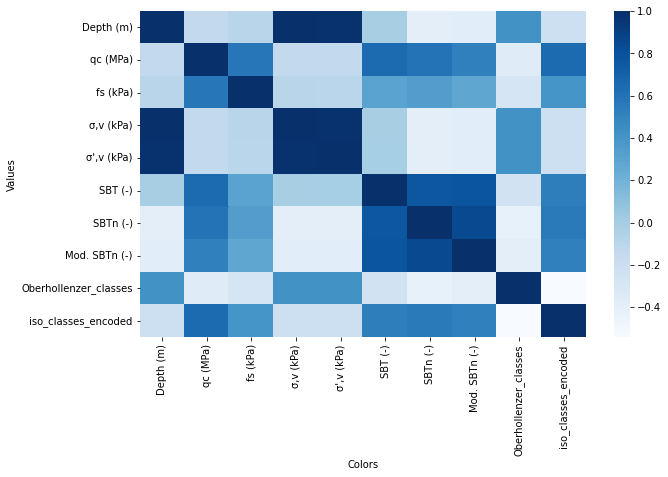

In [3]:
#Import libs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
fig = sns.heatmap(df_cpt.corr(),cmap='Blues',annot=False)
plt.xlabel("Colors")
plt.ylabel("Values")
plt.show(fig)

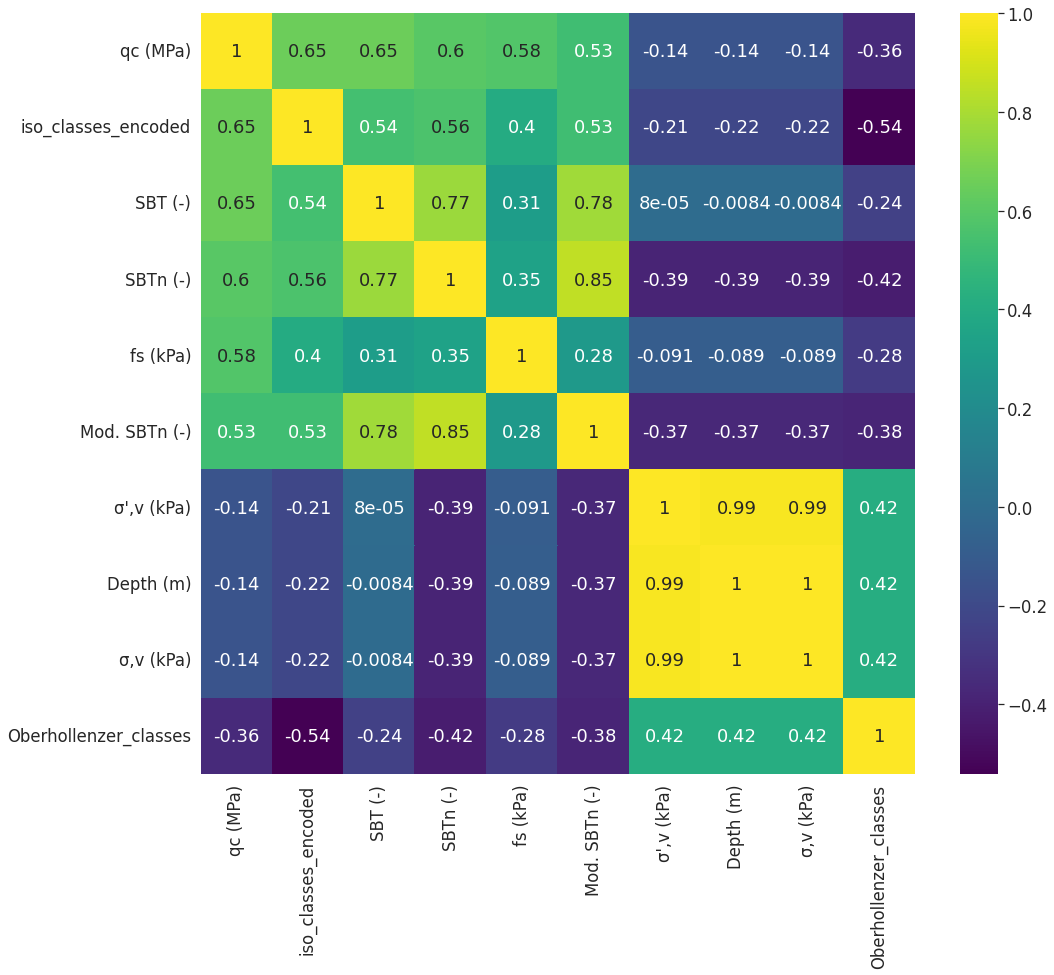

In [8]:
#qc (MPa) correlation matrix
k = 10 #number of variables for heatmap
cols = df_cpt.corr().nlargest(k, 'qc (MPa)')['qc (MPa)'].index
cm = df_cpt[cols].corr()
plt.figure(figsize=(16,14))
#plt.title('Correlation of Variables')
sns.heatmap(cm, annot = True, cmap = 'viridis')
#font size
sns.set(font_scale = 0.5)
plt.savefig('Correlation_of_Variables', dpi = 300)

________________________________________________________________________________
Distribution

Inputs: Depth (m), σ,v (kPa), σ',v (kPa), SBT (-), SBTn (-)	Mod. SBTn (-)	Oberhollenzer_classes	iso_classes_encoded

Outputs: qc (MPa), fs (kPa)
________________________________________________________________________________

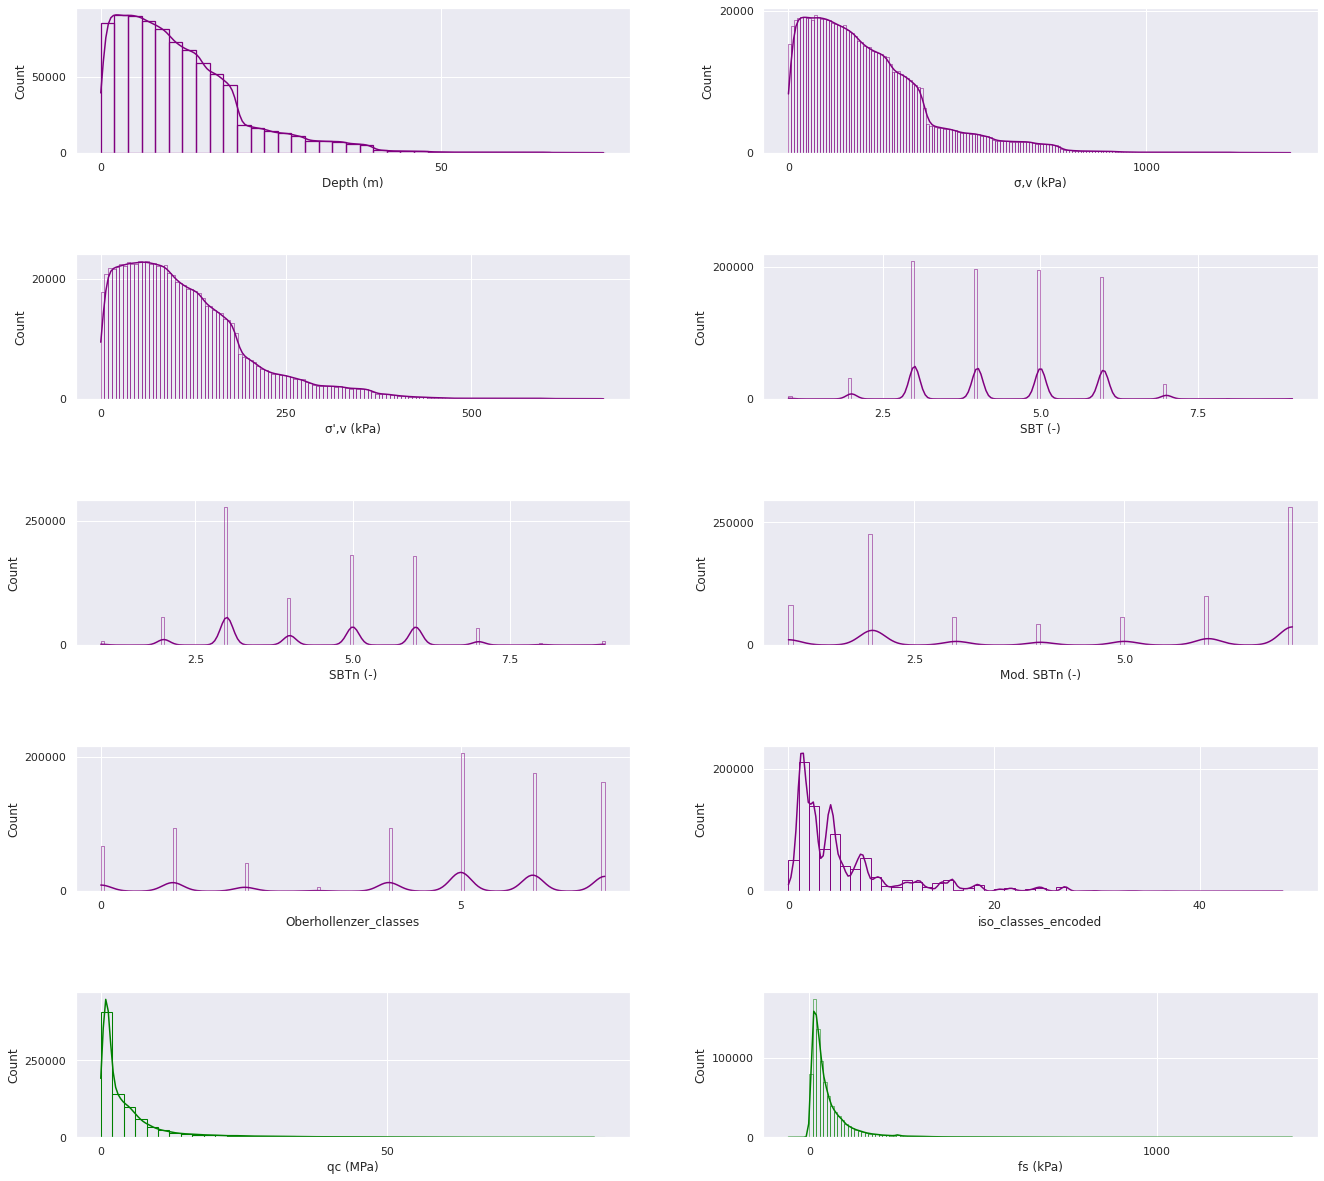

In [5]:
#https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

#Seaborn and Matplot
fig, axes = plt.subplots(5, 2, figsize = (20, 18)) 

#font size
sns.set(font_scale = 5)

# Depth (m)
sns.histplot(df_cpt['Depth (m)'], color = 'purple', ax = axes[0, 0], binwidth = 2, fill = False, kde = True)

#σ,v (kPa)
sns.histplot(df_cpt['σ,v (kPa)'], color = 'purple', ax = axes[0, 1], binwidth = 8, fill = False, kde = True)

#σ',v (kPa) Distribution
sns.histplot(df_cpt["σ',v (kPa)"], color = 'purple', ax = axes[1, 0], binwidth = 5, fill = False, kde = True)

#SBT (-) Distribution
sns.histplot(df_cpt["SBT (-)"], color = 'purple', ax = axes[1, 1], binwidth = 0.05, fill = False, kde = True)

#SBTn (-) Distribution
sns.histplot(df_cpt["SBTn (-)"], color = 'purple', ax = axes[2, 0], binwidth = 0.05, fill = False, kde = True)

#Mod. SBTn (-) Distribution
sns.histplot(df_cpt["Mod. SBTn (-)"], color = 'purple', ax = axes[2, 1], binwidth = 0.05, fill = False, kde = True)

#Oberhollenzer_classes Distribution
sns.histplot(df_cpt["Oberhollenzer_classes"], color = 'purple', ax = axes[3, 0], binwidth = 0.05, fill = False, kde = True)

#iso_classes_encoded Distribution
sns.histplot(df_cpt["iso_classes_encoded"], color = 'purple', ax = axes[3, 1], binwidth = 1, fill = False, kde = True)

#qc (MPa) Distribution
sns.histplot(df_cpt["qc (MPa)"], color = 'green', ax = axes[4, 0], binwidth = 2, fill = False, kde = True)

#fs (kPa) Distribution
sns.histplot(df_cpt["fs (kPa)"], color = 'green', ax = axes[4, 1], binwidth = 10, fill = False, kde = True)

#Saving the histplot
fig.tight_layout()
fig.savefig("histplot_Variables", dpi = 600)

________________________________________________________________________________
Box Plot

Inputs: Depth (m), σ,v (kPa), σ',v (kPa), SBT (-), SBTn (-)	Mod. SBTn (-)	Oberhollenzer_classes	iso_classes_encoded

Outputs: qc (MPa), fs (kPa)
________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

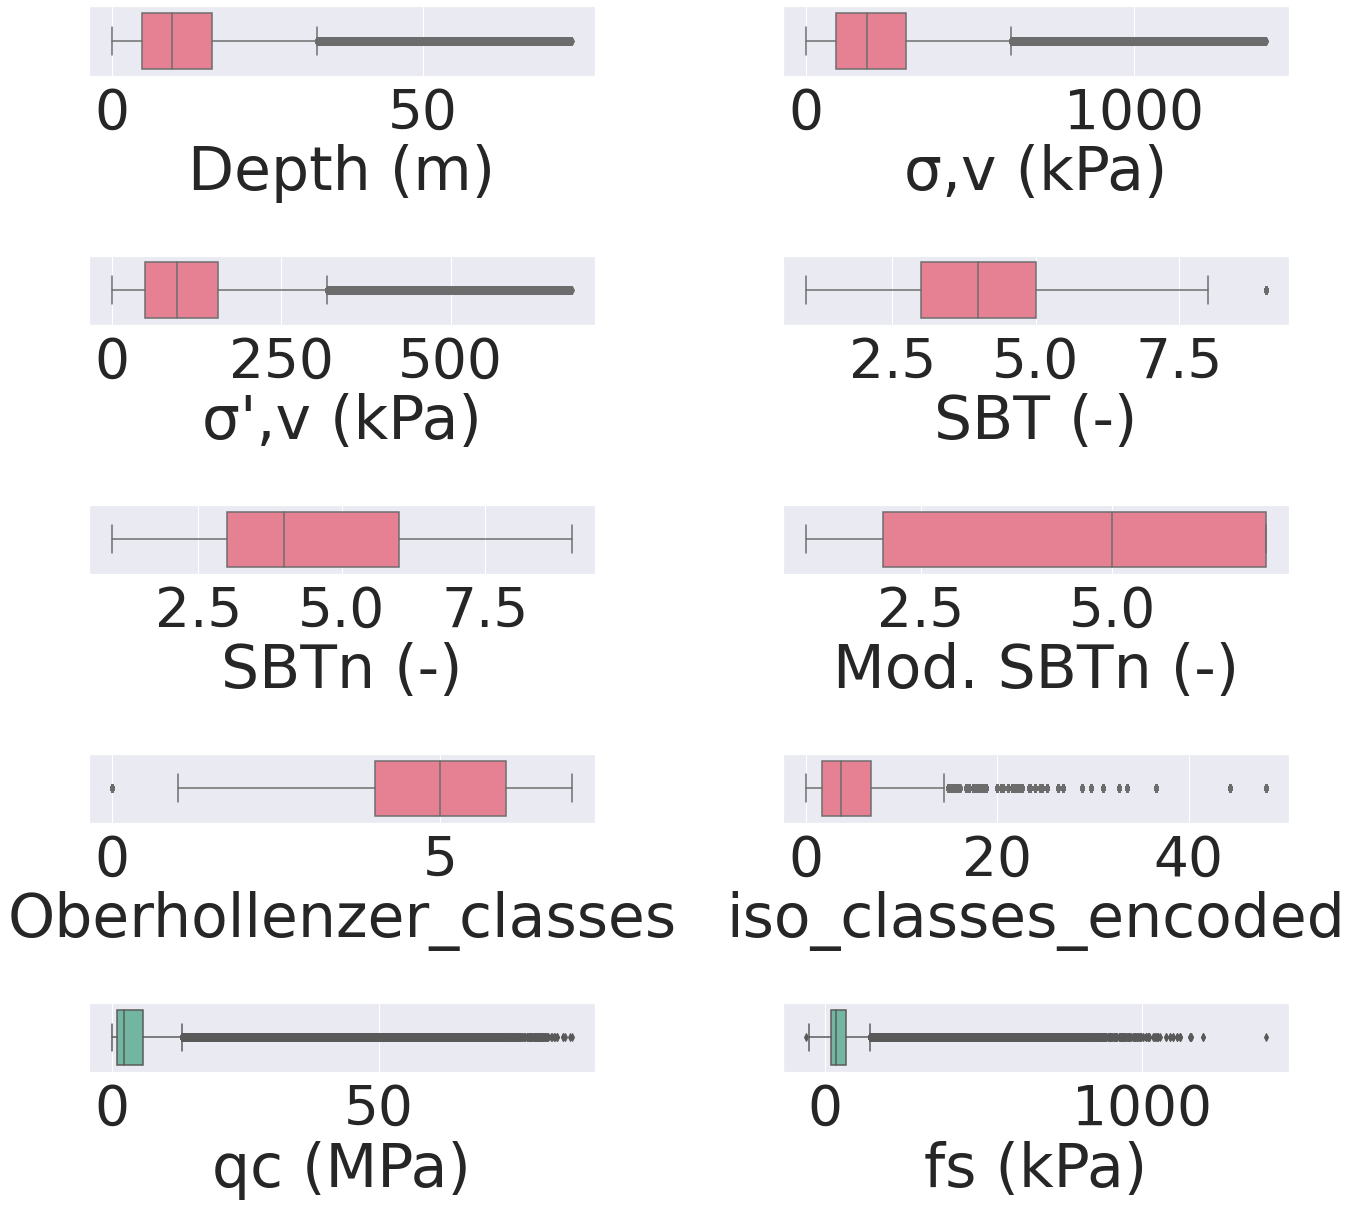

In [6]:
#https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

#Seaborn and Matplot
fig, axes = plt.subplots(5, 2, figsize = (20, 18))

#font size
sns.set(font_scale = 4)

# Depth (m)
sns.boxplot(df_cpt['Depth (m)'], color = 'green', palette = 'husl', orient = 'v', ax = axes[0, 0])

#σ,v (kPa)
sns.boxplot(df_cpt['σ,v (kPa)'],color = 'green', orient = 'v', palette = 'husl', ax = axes[0, 1])

#σ',v (kPa) Distribution
sns.boxplot(df_cpt["σ',v (kPa)"], color = 'green', orient = 'v', palette = 'husl', ax = axes[1, 0])

#SBT (-) Distribution
sns.boxplot(df_cpt["SBT (-)"], color = 'green', orient = 'v', palette = 'husl', ax = axes[1, 1])

#SBTn (-) Distribution
sns.boxplot(df_cpt["SBTn (-)"], color = 'green', orient = 'v', palette = 'husl', ax = axes[2, 0])

#Mod. SBTn (-) Distribution
sns.boxplot(df_cpt["Mod. SBTn (-)"], color = 'green', orient = 'v', palette = 'husl', ax = axes[2, 1])

#Oberhollenzer_classes Distribution
sns.boxplot(df_cpt["Oberhollenzer_classes"], color = 'green', orient = 'v', palette = 'husl', ax = axes[3, 0])

#iso_classes_encoded Distribution
sns.boxplot(df_cpt["iso_classes_encoded"], color = 'green', orient = 'v', palette = 'husl', ax = axes[3, 1])

#qc (MPa) Distribution
sns.boxplot(df_cpt["qc (MPa)"], color = 'green', orient = 'v', palette = 'Set2', ax = axes[4, 0])

#fs (kPa) Distribution
sns.boxplot(df_cpt["fs (kPa)"], color = 'green', orient = 'v', palette = 'Set2', ax = axes[4, 1])

#Saving the Boxplot
fig.tight_layout()
fig.savefig("Boxplot_Variables", dpi = 600)